In [4]:
import networkx as nx
import itertools

def dfs_trees(G):
    n=G.order()
    adj = G.adjacency_matrix()
    G1 = G.networkx_graph() 
    DFS_trees=[] #This holds all DFS TREES AT THE END
    all_permutations=list(itertools.permutations([i for i in range(1,n)]))
    for permutation in all_permutations:
        mapping=[0]*n
        for i in range (1,n):
            mapping[i]=permutation[i-1]
        G1=nx.Graph()
        for i in range(n):
            G1.add_node(mapping[i])
        for i in range(n):
            for j in range(n):
                if adj[mapping[i]][mapping[j]]==1:
                    G1.add_edge(mapping[i],mapping[j])
        t1=nx.dfs_tree(G1,0)
        DFS_trees.append(t1)
    A=[tuple(Graph(nx.to_dict_of_dicts(x.to_undirected())).edges(labels=False)) for x in DFS_trees]
    return list(set(A))

In [2]:
def dfs_trees_1(G1):
    if type(G1) == type(graphs.CompleteGraph(1)):
        G1 = G1.networkx_graph()
    G1_edges = G1.edges
    DFS_trees=set() #This holds all DFS TREES AT THE END
    all_permutations=list(itertools.permutations([i for i in range(1,len(G1.nodes))]))
    for permutation in all_permutations:
        G=nx.Graph()
        G.add_nodes_from(permutation)
        G.add_edges_from(G1_edges)
        t=tuple(Graph(nx.to_dict_of_dicts(nx.dfs_tree(G,0).to_undirected())).edges(labels=False))
        DFS_trees.add(t)
    return list(set(DFS_trees))
        

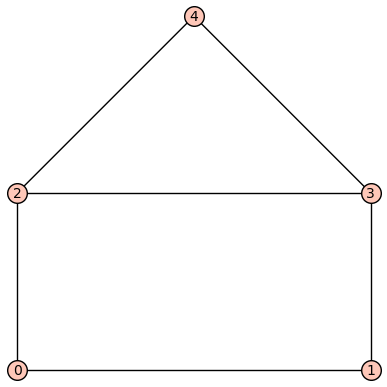

None


[((0, 1), (0, 2), (2, 3), (2, 4)), ((0, 1), (0, 2), (1, 3), (2, 4))]

In [3]:
g=graphs.HouseGraph()
print (g.show())
dfs_trees(g)

In [4]:
# Find all spanning trees of graph G
def tree_graph(g):
    all_spanning_trees = dfs_trees(g)
    graph_T=Graph()
    for s in all_spanning_trees:
        graph_T.add_vertex(s)
    for v_1 in all_spanning_trees:
        for v_2 in all_spanning_trees:
            x=set(v_1).symmetric_difference(set(v_2))
            if len(x)==2:
                graph_T.add_edges( [ (v_1, v_2) ])
    return graph_T

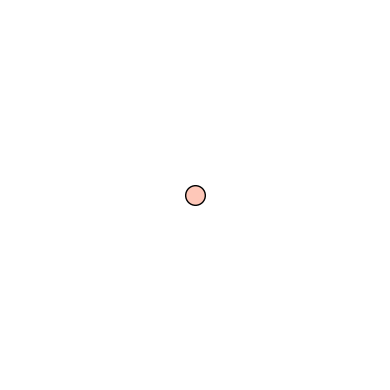

0 None


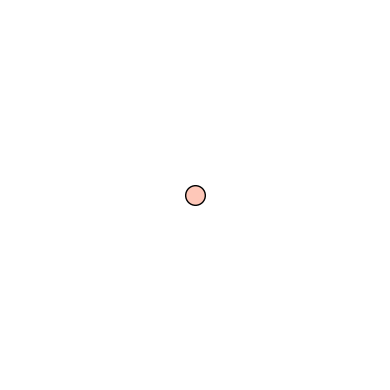

1 None


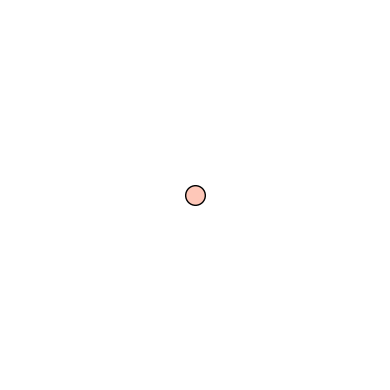

2 None


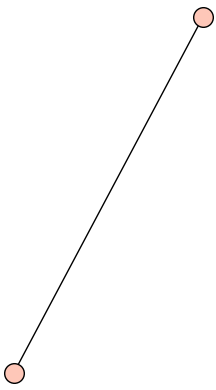

3 None


4 None


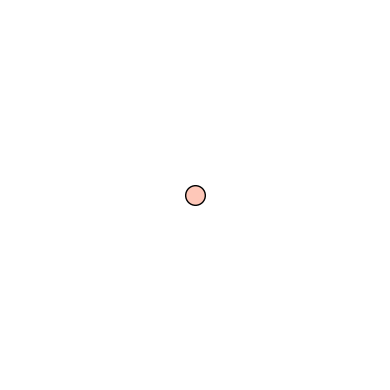

5 None


In [5]:
from sage.graphs.connectivity import is_connected
i=0
for g in graphs(4):
    if is_connected(g):
        print(i,tree_graph(g).show(vertex_labels=False))
        i=i+1
#dfs_trees(g)


In [ ]:
from sage.graphs.connectivity import is_connected
m = 0
for g in graphs(4):
    if is_connected(g) and is_connected(tree_graph(g)):
        if tree_graph(g).order()> 1 and tree_graph(g).hamiltonian_path() is None:
#             print(tree_graph(g).show(vertex_labels=False))
#             image = tree_graph(g).plot(layout='circular', figsize=10)
#             filename = 'graph_%d' % m
#             image.save(filename + ".png")
#             m += 1
            print(image)
#             if 0 not in G.spectrum():
#                 print(G.show(layout='circular', figsize=8))

            


In [10]:
g = graphs.Grid2dGraph(3, 3)
g.hamiltonian_path() is not None

True

# All graphs of size N that their tree-graphs are connected.

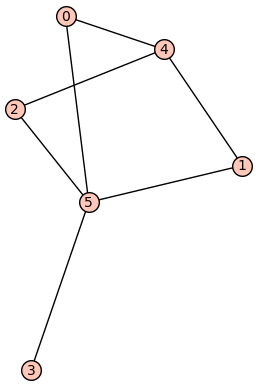

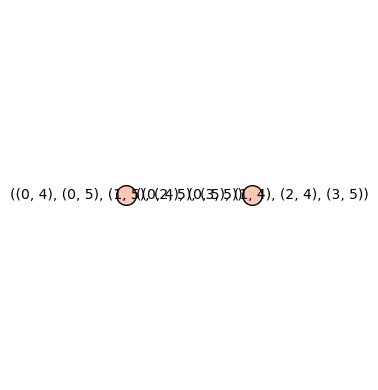

None None


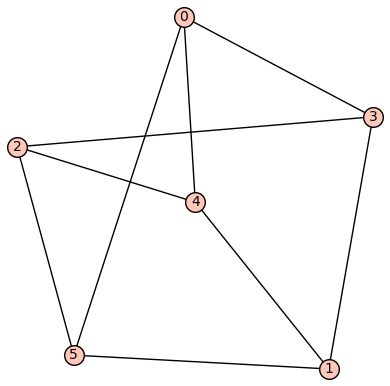

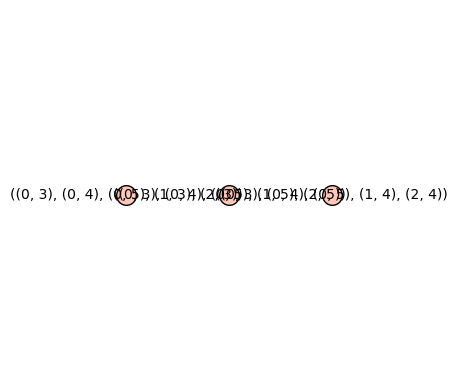

None None


In [35]:
from multiprocessing import Pool

N = 6

Connected_graphs = set()
# def is_dfs_tree_connected(g):
#     if is_connected(g) and is_connected(tree_graph(g)):
#             if tree_graph(g).order()> 1 and tree_graph(g).is_connected():
#                 G = tuple(Graph(nx.to_dict_of_dicts(g))).edges(labels=False)
#                 dfs_tree=tuple(Graph(nx.to_dict_of_dicts(nx.dfs_tree(g,0).to_undirected()))).edges(labels=False)
#                 Connected_graphs.add((G, dfs_tree))

# with Pool(4) as p:
#     p.map(is_dfs_tree_connected, [graphs(7)])
for g in graphs(N):
    if is_connected(g) and g.is_bipartite():
        TG = tree_graph(g)
        all_cycles = g.to_directed().all_simple_cycles()
        if len(all_cycles) % 2 == 1 and not is_connected(TG):
            print (g.show(), TG.show())
        if TG.order()>1 :
            G = tuple(Graph(nx.to_dict_of_dicts(g.networkx_graph())).edges(labels=False))
            dfs_tree=tuple(Graph(nx.to_dict_of_dicts(TG.networkx_graph())).edges(labels=False))
            Connected_graphs.add((G, dfs_tree))


# for g, dfs_tree in Connected_graphs:
#     g1 = Graph()
#     g1.add_edges(g)
#     dfs = Graph()
#     dfs.add_edges(dfs_tree)
#     print(dfs.show(vertex_labels=False))

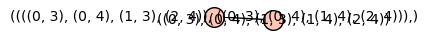

In [20]:
g = Graph()
g.add_edge(list(Connected_graphs)[0])
g.show()

# Random grpahs whos tree-graphs are not connected. 
## Here we use random grpahs to reduce the amount of calculations and look at the graphs with higher number of vertices

In [34]:
from sage.graphs.connectivity import is_connected
from random import randint

m = 0
for _ in range(1000):
    #i ,j = randint(), randint()
    g = graphs.RandomBarabasiAlbert(10,5) 
    if is_connected(g) and is_connected(tree_graph(g)) is None:
        if tree_graph(g).order()> 1:
            print(tree_graph(g).show(vertex_labels=False))
#             image = tree_graph(g).plot(layout='circular', figsize=10, vertex_labels=False)
#             filename = 'Figs/graph_%d' % m
#             image.save(filename + ".png")
#             m += 1
#             print(image)
#             if 0 not in G.spectrum():
#                 print(G.show(layout='circular', figsize=8))

          

# Conj: A tree-graph of a graph G is disconnected if and only if there exists two vertices $u, v \in V$ such that $d(v) == d(u) == i+1$ and $N[v] \cap V_i == N[u] \cap V_i$ 

In [55]:
def dfs_trees_graphs(G):
    n=G.order()
    adj = G.adjacency_matrix()
    G1 = G.networkx_graph() 
    DFS_trees=[] #This holds all DFS TREES AT THE END
    all_permutations=list(itertools.permutations([i for i in range(1,n)]))
    for permutation in all_permutations:
        mapping=[0]*n
        for i in range (1,n):
            mapping[i]=permutation[i-1]
        G1=nx.Graph()
        for i in range(n):
            G1.add_node(mapping[i])
        for i in range(n):
            for j in range(n):
                if adj[mapping[i]][mapping[j]]==1:
                    G1.add_edge(mapping[i],mapping[j])
        t1=nx.dfs_tree(G1,0)
        DFS_trees.append(t1)
    return A

N = 8
Graph_set = set()
for g in graphs(N):
    if is_connected(g):
        TG = tree_graph(g)
        con = is_connected(TG)
        layers = dict(enumerate(nx.dfs_layers(g, [0])))
        for lvl in layers:
            layer = layers[lvl]
            if lvl == 0 : continue
            for node1 in layer:
                for node2 in layer:
                    if node1 != node2:
                        node1_N = set(g.neighbors(node1)).intersection(set(layers[lvl-1]))
                        node2_N = set(g.neighbors(node2)).intersection(set(layers[lvl-1]))
                        if len(node1_N.intersection(node2_N)) >= 2 and \
                            len(node1_N.symmetric_difference(node2_N)) == 0 and\
                            con == True:
                            print (layers, node1, node2)
                            print(g.show())
                            
                            


# Conj: The tree-graph G' of a graph G is connected if and only if all permutations of vertices of each layer of bsf-tree of G can be genrated.

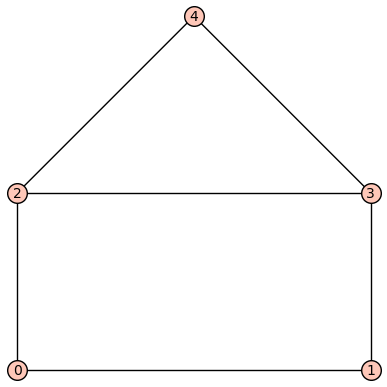

None (1, 2, 3, 4) {0: [1, 2], 1: [3], 2: [4]}


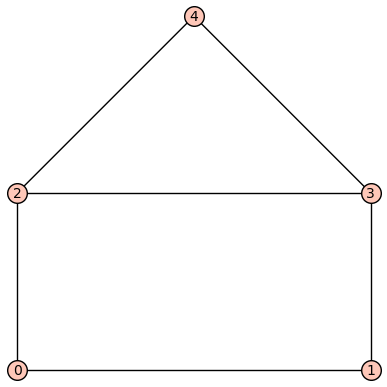

None (1, 2, 4, 3) {0: [1, 2], 1: [3], 2: [4]}


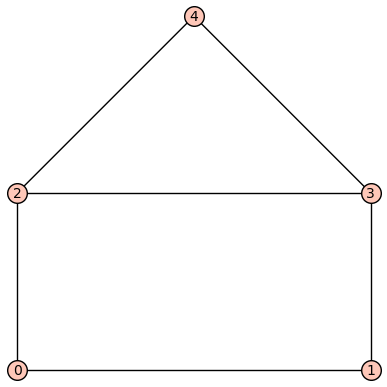

None (1, 3, 2, 4) {0: [1, 2], 1: [3], 2: [4]}


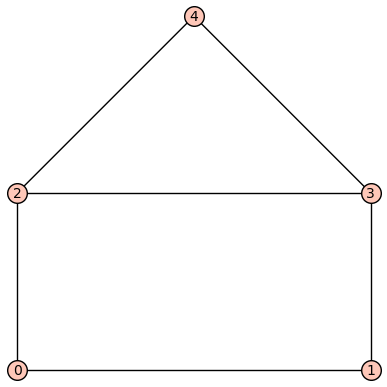

None (1, 3, 4, 2) {0: [1, 2], 1: [3], 2: [4]}


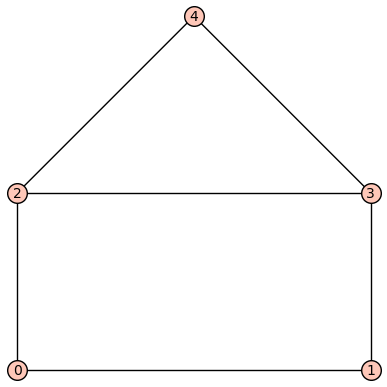

None (1, 4, 2, 3) {0: [1, 2], 1: [3], 2: [4]}


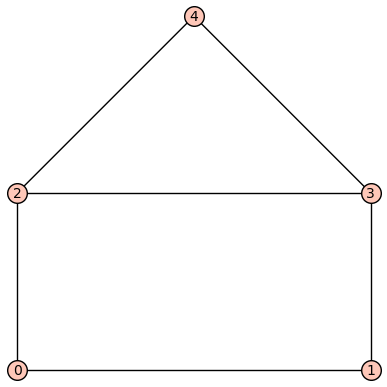

None (1, 4, 3, 2) {0: [1, 2], 1: [3], 2: [4]}


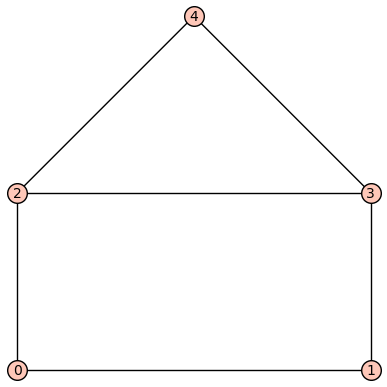

None (2, 1, 3, 4) {0: [1, 2], 1: [3], 2: [4]}


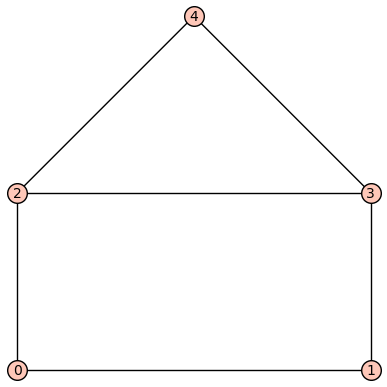

None (2, 1, 4, 3) {0: [1, 2], 1: [3], 2: [4]}


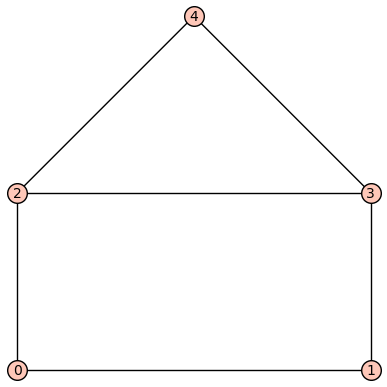

None (2, 3, 1, 4) {0: [1, 2], 1: [3], 2: [4]}


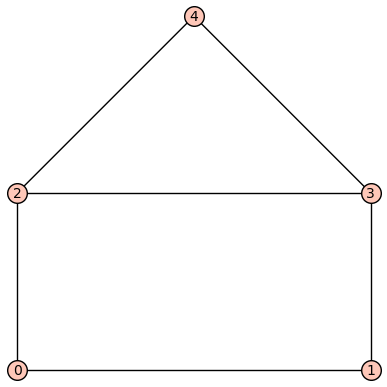

None (2, 3, 4, 1) {0: [1, 2], 1: [3], 2: [4]}


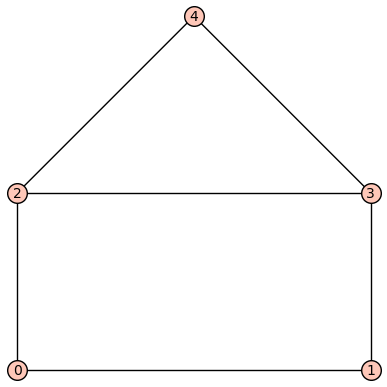

None (2, 4, 1, 3) {0: [1, 2], 1: [3], 2: [4]}


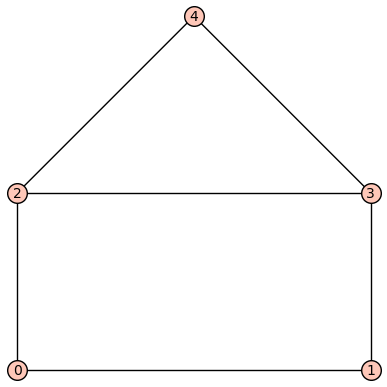

None (2, 4, 3, 1) {0: [1, 2], 1: [3], 2: [4]}


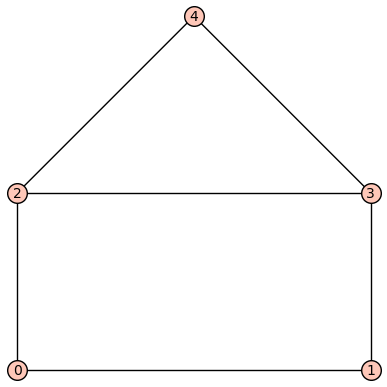

None (3, 1, 2, 4) {0: [1, 2], 1: [3], 2: [4]}


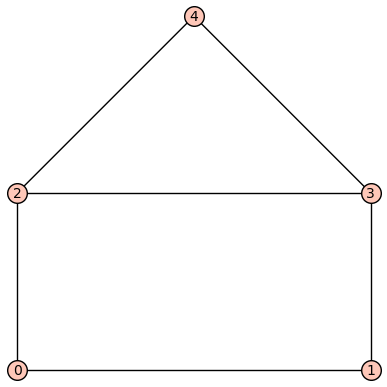

None (3, 1, 4, 2) {0: [1, 2], 1: [3], 2: [4]}


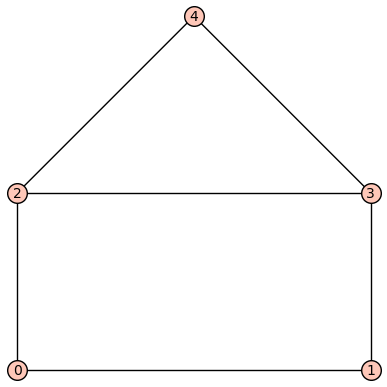

None (3, 2, 1, 4) {0: [1, 2], 1: [3], 2: [4]}


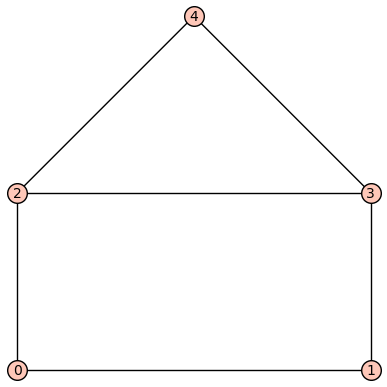

None (3, 2, 4, 1) {0: [1, 2], 1: [3], 2: [4]}


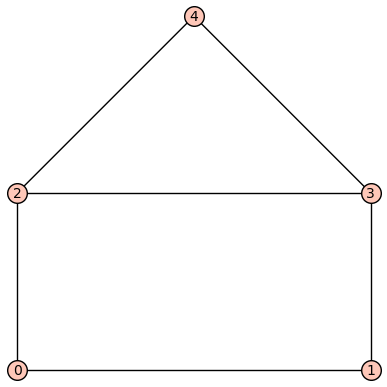

None (3, 4, 1, 2) {0: [1, 2], 1: [3], 2: [4]}


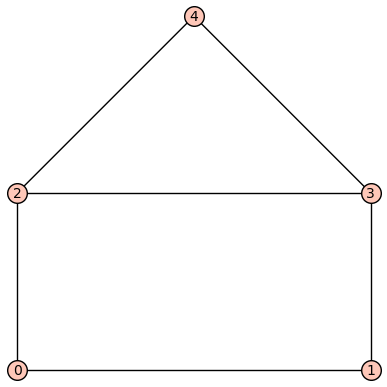

None (3, 4, 2, 1) {0: [1, 2], 1: [3], 2: [4]}


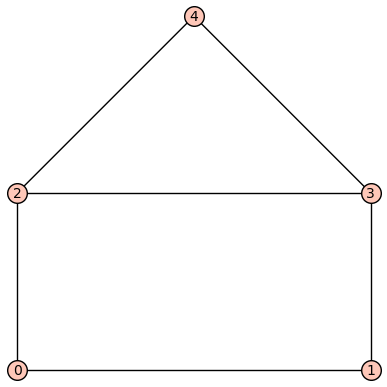

None (4, 1, 2, 3) {0: [1, 2], 1: [3], 2: [4]}


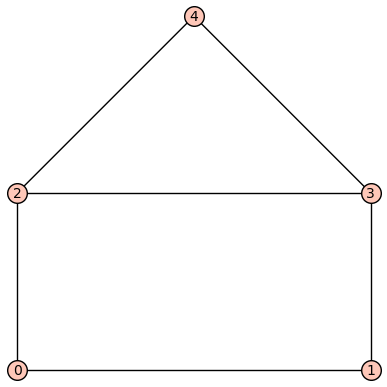

None (4, 1, 3, 2) {0: [1, 2], 1: [3], 2: [4]}


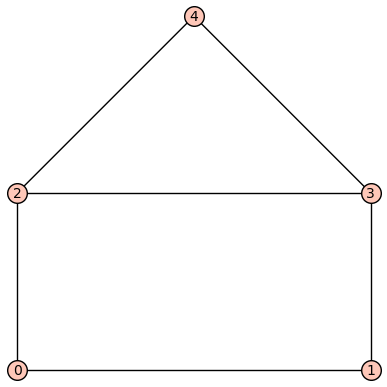

None (4, 2, 1, 3) {0: [1, 2], 1: [3], 2: [4]}


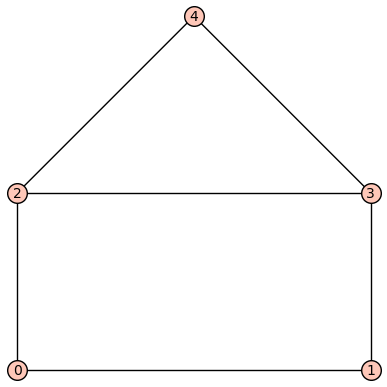

None (4, 2, 3, 1) {0: [1, 2], 1: [3], 2: [4]}


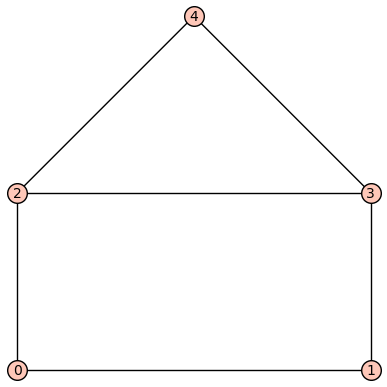

None (4, 3, 1, 2) {0: [1, 2], 1: [3], 2: [4]}


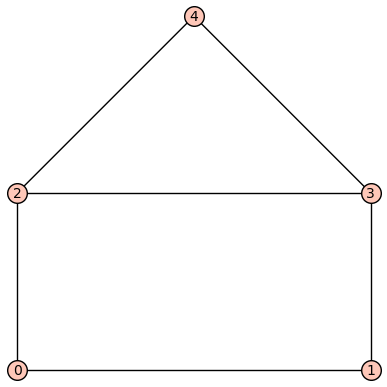

None (4, 3, 2, 1) {0: [1, 2], 1: [3], 2: [4]}


In [7]:
def dfs_trees_graphs_perm(G):
    n=G.order()
    adj = G.adjacency_matrix()
    G1 = G.networkx_graph() 
    DFS_trees=[] #This holds all DFS TREES AT THE END
    all_permutations=list(itertools.permutations([i for i in range(1,n)]))
    for permutation in all_permutations:
        mapping=[0]*n
        for i in range (1,n):
            mapping[i]=permutation[i-1]
        G1=nx.Graph()
        for i in range(n):
            G1.add_node(mapping[i])
        for i in range(n):
            for j in range(n):
                if adj[mapping[i]][mapping[j]]==1:
                    G1.add_edge(mapping[i],mapping[j])
        ll = nx.dfs_successors(g.networkx_graph(),0)
        print(g.show(), permutation, dict(ll))

g=graphs.HouseGraph()
dfs_trees_graphs_perm(g)
N = 3
          

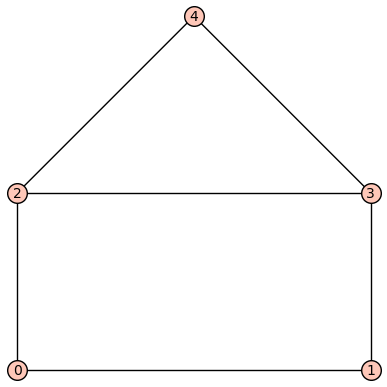

None (1, 3, 4, 2) {0: (0, [1, 2]), 1: (1, [3]), 2: (2, [4])}


{0: [1, 2], 1: [3, 4], 2: [5, 6]}

In [79]:
g=graphs.HouseGraph()
d = dict(enumerate(nx.dfs_layers(g, [0])))
all_perm = list(itertools.permutations([i for i in range(1,5)]))
ll = nx.dfs_successors(g.networkx_graph(),0)
print(g.show(), all_perm[3], dict(enumerate(ll)))

H = nx.Graph()
H.add_edges_from([(0, 1), (0, 2), (1, 3), (1, 4), (2, 5), (2, 6)])
dict(nx.dfs_successors(H, 0))

False


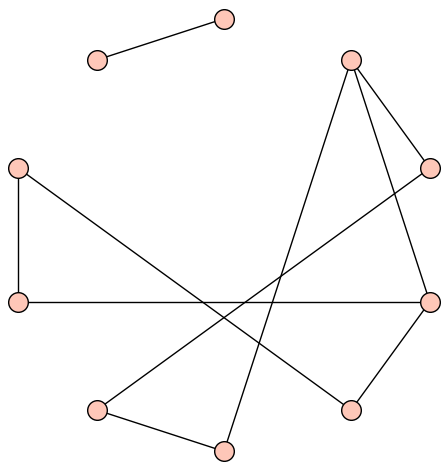

In [10]:
from sage.graphs.graph_input import from_dict_of_dicts
graphs.PetersenGraph().to_dictionary(edge_labels=True)

dic = {0:[1,2,3,4],
         1:[5,6,7,8],
         2:[6,7,8],
         3:[5,7,8],
         4:[8],
         5:[],
         6:[],
         7:[],
         8:[]}

G = Graph(dic)

# edges = {0:[1,2,3,4],
#          1:[5, 8],
#          2:[5,6],
#          3:[6,7],
#          4:[7,8],
#          5:[],
#          6:[],
#          7:[],
#          8:[]}
# G.add_edges_from([(0, 1), (0,2), (0,3), (0,4),(1,5), (1,8),(2,5), (2,6),(3,6), (3,7),(4,7), (4,8)])
G = tree_graph(G)
print(is_connected(G))
G.plot(layout="circular",vertex_labels=False)

In [19]:
graphs.PetersenGraph().to_dictionary(edge_labels=True)

{0: {1: None, 4: None, 5: None},
 1: {0: None, 2: None, 6: None},
 2: {1: None, 3: None, 7: None},
 3: {2: None, 4: None, 8: None},
 4: {0: None, 3: None, 9: None},
 5: {0: None, 7: None, 8: None},
 6: {1: None, 8: None, 9: None},
 7: {2: None, 5: None, 9: None},
 8: {3: None, 5: None, 6: None},
 9: {4: None, 6: None, 7: None}}

In [ ]:
import networkx as nx

# Define the path to the text file containing the graph6 string
file_path = "graphs6.txt"

# Read the graph6 string from the text file
with open(file_path, "r") as file:
    graph6_strings = file.readlines()

    
for graph6_string in graph6_strings:
    # Create a SageMath graph from the graph6 string
    print(graph6_string)
    G = Graph(graph6_string, format='graph6')
    # Plot the graph
    layout = "ranked"
    heights = dict(enumerate(nx.dfs_layers(G.networkx_graph(), 0)))
    by_component = False
    G.show(layout=layout, heights=heights, by_component=by_component)

In [ ]:
from tqdm import tqdm
from sage.graphs.connectivity import is_connected
# Open a file to save the output
n=8
fileName="graph"+str(n)+".txt"
with open(fileName, "w") as file:
    # Iterate over the graphs with tqdm to show a progress bar
    for g in tqdm(graphs(n)):
        if is_connected(g):
            if tree_graph(g).order() > 1 and not is_connected(tree_graph(g)):
                # Write the graph6 string to the file
                file.write(g.graph6_string() + "\n")